In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [19]:
import astropy.cosmology as cosmo
from astropy.cosmology import Planck15
import astropy.units as u
import h5py
import seaborn as sns

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('colorblind')

['etaobs', 'm1s', 'm2s', 'mcobs', 'posteriors', 'rhoobs', 'sigma_eta', 'sigma_mc', 'sigma_rho', 'sigma_t', 'thetaobs', 'thetas', 'zs']


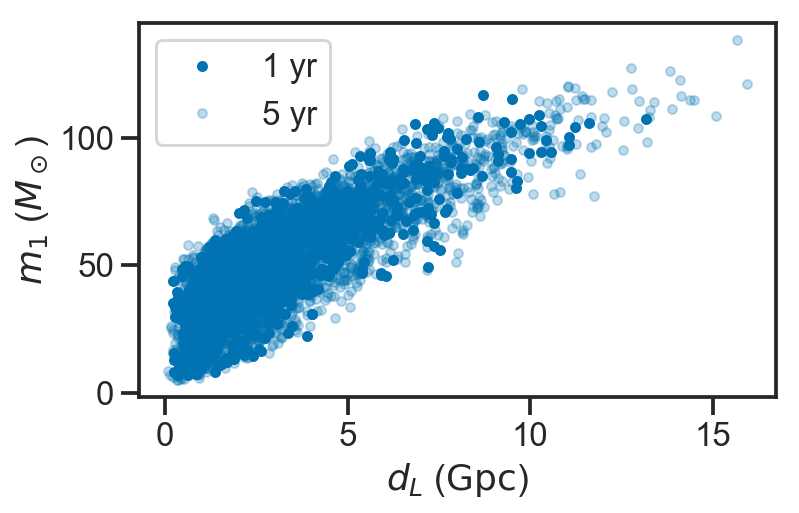

In [20]:
with h5py.File('observations.h5', 'r') as f:
    print(list(f.keys()))
    m1 = array(f['m1s'])
    m2 = array(f['m2s'])
    z = array(f['zs'])
    d = Planck15.luminosity_distance(z).to(u.Gpc).value
    
    n1yr, T1yr = f.attrs['1yr']
    n5yr, T5yr = f.attrs['5yr']
    
    n1yr = int(round(n1yr))
    n5yr = int(round(n5yr))
    
plot(d[:n1yr], m1[:n1yr]*(1+z[:n1yr]), '.', color=sns.color_palette()[0], label='1 yr')
plot(d[n1yr:], m1[n1yr:]*(1+z[n1yr:]), '.', color=sns.color_palette()[0], alpha=0.25, label='5 yr')

xlabel(r'$d_L$ ($\mathrm{Gpc}$)')
ylabel(r'$m_1$ ($M_\odot$)')

legend(loc='best')

tight_layout()
savefig('/tmp/ideal_data.pdf')

In [11]:
ms = exp(arange(log(1), log(400), 0.01))
def smooth(x, x0, s):
    return exp(-0.5*((log(x)-log(x0))/s)**2)
pms = ms**-0.75*where(ms < 5, smooth(ms, 5, 0.1), 1.0)*where(ms>40,smooth(ms, 40, 0.1),1.0)
pms = pms / trapz(pms, ms)

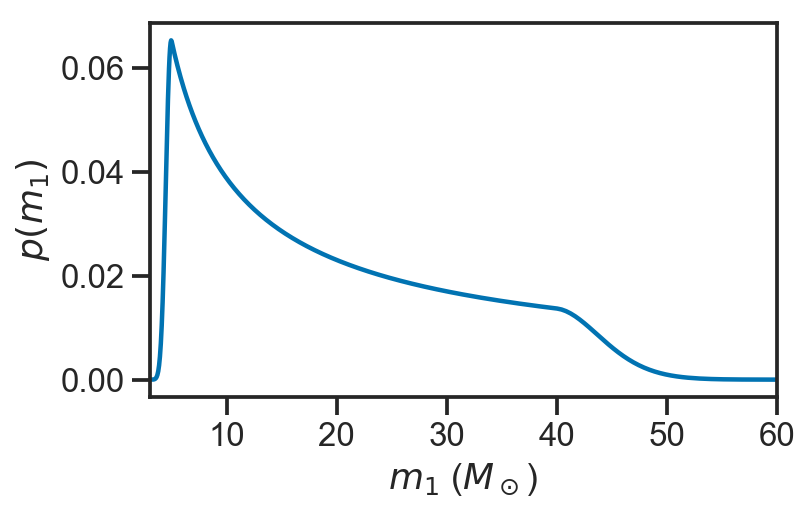

In [17]:
plot(ms, pms)
axis(xmin=3, xmax=60)
xlabel(r'$m_1$ ($M_\odot$)')
ylabel(r'$p\left( m_1 \right)$')

tight_layout()
savefig('/tmp/pm1.pdf')

In [18]:
n1yr, n5yr

(918, 4507)

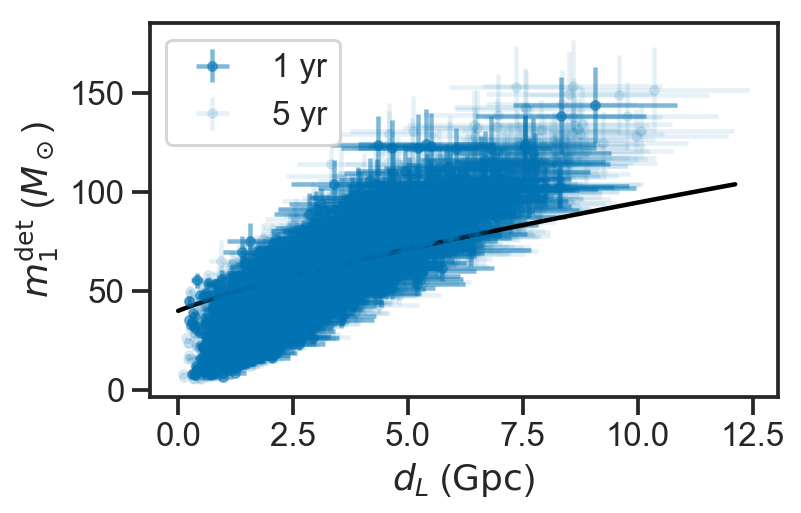

In [29]:
with h5py.File('observations.h5', 'r') as f:
    m1s = array(f['posteriors/m1det'])
    dls = array(f['posteriors/dl'])
    
z = linspace(0, 1.6, 100)
d = Planck15.luminosity_distance(z).to(u.Gpc).value

errorbar(mean(dls[:n1yr, :], axis=1), mean(m1s[:n1yr, :], axis=1), xerr=std(dls[:n1yr,:], axis=1), yerr=std(m1s[:n1yr, :], axis=1), color=sns.color_palette()[0], fmt='.', label='1 yr', alpha=0.5)
errorbar(mean(dls[n1yr:, :], axis=1), mean(m1s[n1yr:, :], axis=1), xerr=std(dls[n1yr:,:], axis=1), yerr=std(m1s[n1yr:, :], axis=1), color=sns.color_palette()[0], fmt='.', label='5 yr', alpha=0.1)

plot(d, 40*(1+z), '-k')

xlabel(r'$d_L$ ($\mathrm{Gpc}$)')
ylabel(r'$m_1^\mathrm{det}$ ($M_\odot$)')
legend(loc='best')

tight_layout()

savefig('/tmp/uncertainty.pdf')